# Machine Learning - Neural Networks 
## Project to classify flowers of different Iris species 
### - by Vinay Kumar Ranganath Babu

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in dataset
columns = ["sepal_length","sepal_width","petal_length","petal_width","species"]
iris = pd.read_csv("iris.data")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


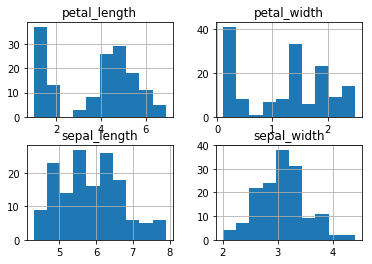

In [20]:
# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

# There are 2 species
print(iris.species.unique())
iris.hist()
plt.show()

# Neurons

In [22]:
# Variables to test sigmoid_activation
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

# The first observation
x0 = X[0]

# Initialize thetas randomly 
theta_init = np.random.normal(0,0.01,size=(5,1))
def sigmoid_activation(x, theta):
    x = np.asarray(x)
    theta = np.asarray(theta)
    return 1 / (1 + np.exp(-np.dot(theta.T, x)))
                
a1 = sigmoid_activation(x0, theta_init)
a1

array([ 0.50303132])

# Back Propagation algorithm

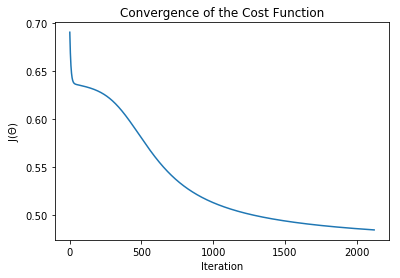

In [24]:
# Using a class for this model
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then inputted to the output layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

# Splitting Data

In [25]:
# First 70 rows to X_train and y_train
# Last 30 rows to X_train and y_train
X_train = X[:70]
y_train = y[:70]

X_test = X[-30:]
y_test = y[-30:]

# Predicting Iris Flowers

In [27]:
from sklearn.metrics import roc_auc_score
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
model.learn(X_train, y_train)

yhat = model.predict(X_test)[0]

auc = roc_auc_score(y_test, yhat)

yhat

array([ 0.02990412,  0.0597063 ,  0.03732631,  0.58137316,  0.07412082,
        0.58123669,  0.57669484,  0.06462995,  0.58115383,  0.57698732,
        0.58150051,  0.58147509,  0.57863133,  0.58160464,  0.58160333,
        0.04351488,  0.0680633 ,  0.58049326,  0.57870531,  0.57746851,
        0.57674326,  0.57912078,  0.58100927,  0.57289047,  0.57964005,
        0.04855897,  0.58000934,  0.58104218,  0.04112844,  0.57494799])

In [28]:
auc

0.45999999999999996